In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import confusion_matrix, classification_report, f1_score


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/onehot_encoding_standard_scaling_data.csv", delimiter=",")
print(df.shape)
df.head()

(5976, 48)


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_No,Churn_Yes
0,1.611381,-1.353483,-0.247769,False,True,True,False,False,True,False,...,False,True,True,False,False,True,False,False,True,False
1,0.468468,0.774066,0.736669,True,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False
2,0.223558,0.335602,0.251453,True,False,False,True,False,True,True,...,False,False,False,True,True,False,False,False,False,True
3,-1.164265,-0.297182,-0.905725,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,-1.245901,-0.378564,-0.958057,False,True,True,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn_Yes', 'Churn_No']),
                                                    df['Churn_Yes'],
                                                    test_size=0.3,
                                                    random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4183, 46), (1793, 46), (4183,), (1793,))

In [27]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()
categorical_features, numeric_features

([],
 ['tenure',
  'MonthlyCharges',
  'TotalCharges',
  'gender_Female',
  'gender_Male',
  'SeniorCitizen_0',
  'SeniorCitizen_1',
  'Partner_No',
  'Partner_Yes',
  'Dependents_No',
  'Dependents_Yes',
  'PhoneService_No',
  'PhoneService_Yes',
  'MultipleLines_No',
  'MultipleLines_No_phone_service',
  'MultipleLines_Yes',
  'InternetService_DSL',
  'InternetService_Fiber_optic',
  'InternetService_No',
  'OnlineSecurity_No',
  'OnlineSecurity_No_internet_service',
  'OnlineSecurity_Yes',
  'OnlineBackup_No',
  'OnlineBackup_No_internet_service',
  'OnlineBackup_Yes',
  'DeviceProtection_No',
  'DeviceProtection_No_internet_service',
  'DeviceProtection_Yes',
  'TechSupport_No',
  'TechSupport_No_internet_service',
  'TechSupport_Yes',
  'StreamingTV_No',
  'StreamingTV_No_internet_service',
  'StreamingTV_Yes',
  'StreamingMovies_No',
  'StreamingMovies_No_internet_service',
  'StreamingMovies_Yes',
  'Contract_Month-to-month',
  'Contract_One_year',
  'Contract_Two_year',
  'Pape

In [28]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=40)

In [29]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5).set_output(transform="pandas"))
                                      ])

numeric_transformer

Pipeline(steps=[('knn_imputer', KNNImputer())])

In [30]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer,
                                                       numeric_features)]).set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer',
                                                  KNNImputer())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges',
                                  'gender_Female', 'gender_Male',
                                  'SeniorCitizen_0', 'SeniorCitizen_1',
                                  'Partner_No', 'Partner_Yes', 'Dependents_No',
                                  'Dependents_Yes', 'PhoneService_No',
                                  'PhoneService_Yes', 'MultipleLines_No',
                                  'MultipleLines_No_phone_service',
                                  'Multip...e_DSL',
                                  'InternetService_Fiber_optic',
                                  'InternetService_No', 'OnlineSecurity_No',
                                  'OnlineSecurity_No_internet_service',
                                  'OnlineSecurity_Yes', 'OnlineBackup_No',
                                  'OnlineBackup_No_internet_service',
                                  'OnlineBackup_Yes', 'DeviceProtection_No',
                                  'DeviceProtection_No_internet_service',
                                  'DeviceProtection_Yes', 'TechSupport_No',
                                  'TechSupport_No_internet_service', ...])])

In [31]:
pipeline_xgb = Pipeline([("pre_process", preprocessor),
                         ("model", xgb)])
pipeline_xgb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'gender_Female',
                                                   'gender_Male',
                                                   'SeniorCitizen_0',
                                                   'SeniorCitizen_1',
                                                   'Partner_No', 'Partner_Yes',
                                                   'Dependents_No',
                                                   'Dependents_Yes',
                                                   'PhoneService_No',
                                                   'PhoneService_Yes',
                                                   'MultipleLines_No',
                                                   'Multiple...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=40, ...))])

In [32]:
pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
scores = {}
scores['xgb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

In [34]:
feature_names = pipeline_xgb['pre_process'].get_feature_names_out()
feature_names

array(['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges',
       'num__gender_Female', 'num__gender_Male', 'num__SeniorCitizen_0',
       'num__SeniorCitizen_1', 'num__Partner_No', 'num__Partner_Yes',
       'num__Dependents_No', 'num__Dependents_Yes',
       'num__PhoneService_No', 'num__PhoneService_Yes',
       'num__MultipleLines_No', 'num__MultipleLines_No_phone_service',
       'num__MultipleLines_Yes', 'num__InternetService_DSL',
       'num__InternetService_Fiber_optic', 'num__InternetService_No',
       'num__OnlineSecurity_No',
       'num__OnlineSecurity_No_internet_service',
       'num__OnlineSecurity_Yes', 'num__OnlineBackup_No',
       'num__OnlineBackup_No_internet_service', 'num__OnlineBackup_Yes',
       'num__DeviceProtection_No',
       'num__DeviceProtection_No_internet_service',
       'num__DeviceProtection_Yes', 'num__TechSupport_No',
       'num__TechSupport_No_internet_service', 'num__TechSupport_Yes',
       'num__StreamingTV_No', 'num__StreamingTV_No

In [35]:
xgb_model = pipeline_xgb['model']
xgb_model.feature_importances_

array([0.01674393, 0.01299502, 0.01318666, 0.01143658, 0.        ,
       0.01302416, 0.        , 0.01032678, 0.        , 0.01060186,
       0.        , 0.02056703, 0.        , 0.01311533, 0.        ,
       0.01049602, 0.04832549, 0.07000171, 0.01231906, 0.05331665,
       0.        , 0.01258131, 0.01397954, 0.        , 0.0099769 ,
       0.0128079 , 0.        , 0.0105973 , 0.02098587, 0.        ,
       0.00896036, 0.01254394, 0.        , 0.02520612, 0.0141521 ,
       0.        , 0.01800086, 0.39933932, 0.02427844, 0.03735544,
       0.0154416 , 0.        , 0.01035893, 0.01144223, 0.01572166,
       0.00981389], dtype=float32)

In [45]:
xgb_importances = pd.DataFrame(
    {"feature": feature_names, "importance": np.round(xgb_model.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
xgb_importances.head(40)

,importance
feature,
num__Contract_Month-to-month,0.399
num__InternetService_Fiber_optic,0.070
num__OnlineSecurity_No,0.053
num__InternetService_DSL,0.048
num__Contract_Two_year,0.037
num__StreamingTV_Yes,0.025
num__Contract_One_year,0.024
num__TechSupport_No,0.021
num__PhoneService_No,0.021


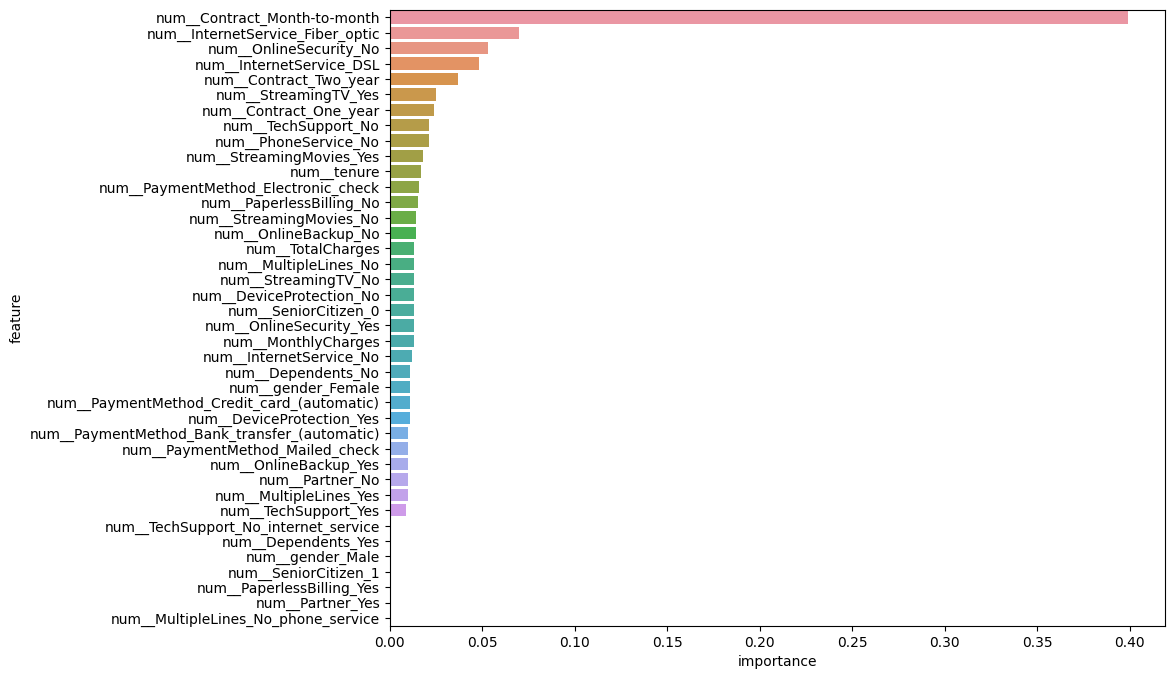

In [44]:
plt.figure(figsize=(10, 8))
sns.barplot(y=xgb_importances.head(40).index,
            x=xgb_importances.head(40).importance);

In [38]:
!pip install h2o

In [39]:
!pip install tpot

In [40]:
!pip install flaml

In [41]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,15 mins 11 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_awb40p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.054 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [42]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data = h2o.H2OFrame.from_python(train_data)
train_data['Churn_Yes'] = train_data['Churn_Yes'].asfactor()
train_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber_optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No_internet_service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No_internet_service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No_internet_service,DeviceProtection_Yes,TechSupport_No,TechSupport_No_internet_service,TechSupport_Yes,StreamingTV_No,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_Yes
-1.28672,-0.489841,-0.988577,True,False,True,False,True,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
-0.919355,0.242594,-0.661325,False,True,True,False,True,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True
-0.266262,1.1843,0.132761,True,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False
-0.715263,0.946795,-0.375301,False,True,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,True
-1.00099,-1.49964,-0.953329,False,True,True,False,False,True,False,True,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,True,False
-1.28672,-0.476554,-0.988401,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True
-1.20508,0.159552,-0.913816,False,True,True,False,True,False,False,True,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True
1.28483,-1.35514,-0.324948,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False
1.24402,0.636216,1.33315,False,True,False,True,False,True,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False
1.12156,0.82057,1.28989,False,True,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False


In [43]:
aml = H2OAutoML(max_models=30, # hard total models experimented limit
                max_runtime_secs=300, # try to run as many models in 5 mins
                max_runtime_secs_per_model=30, # max training time for a model <= 30 s else move to next model
                seed=1)
aml.train(x=X_train.columns.tolist(), y="Churn_Yes", training_frame=train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),1/1
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [46]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_2_20231222_100859,0.843314,0.418851,0.651607,0.23712,0.369632,0.136628,4105,0.022109,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20231222_100859,0.842488,0.419462,0.65022,0.240455,0.36994,0.136856,6602,0.030745,StackedEnsemble
GBM_1_AutoML_2_20231222_100859,0.841631,0.420851,0.650158,0.236457,0.370395,0.137193,440,0.008863,GBM
GBM_grid_1_AutoML_2_20231222_100859_model_2,0.841446,0.421994,0.648875,0.238009,0.370468,0.137247,264,0.007435,GBM
GLM_1_AutoML_2_20231222_100859,0.839133,0.424643,0.639023,0.239034,0.372055,0.138425,464,0.002762,GLM
GBM_grid_1_AutoML_2_20231222_100859_model_4,0.835997,0.42701,0.643732,0.242657,0.372774,0.13896,515,0.009812,GBM
GBM_grid_1_AutoML_2_20231222_100859_model_3,0.835478,0.428193,0.636516,0.247393,0.37359,0.13957,226,0.008248,GBM
XRT_1_AutoML_2_20231222_100859,0.834148,0.490679,0.631405,0.245468,0.400262,0.16021,245,0.006438,DRF
GBM_5_AutoML_2_20231222_100859,0.831732,0.431939,0.636281,0.244733,0.375408,0.140931,470,0.007989,GBM
DeepLearning_grid_2_AutoML_2_20231222_100859_model_1,0.830805,0.439421,0.611542,0.248171,0.378531,0.143285,4754,0.01598,DeepLearning


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

       False       0.90      0.77      0.83      1321
        True       0.55      0.76      0.64       472

    accuracy                           0.77      1793
   macro avg       0.72      0.77      0.73      1793
weighted avg       0.81      0.77      0.78      1793



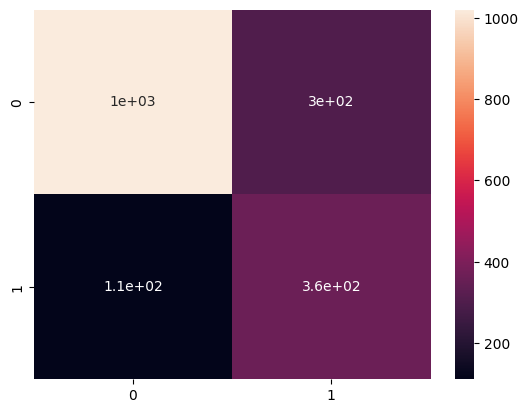

In [47]:
best_model =  aml.get_best_model(criterion="rmse")
X_test_h2o = h2o.H2OFrame.from_python(X_test)
y_pred = best_model.predict(X_test_h2o)
y_pred = y_pred.as_data_frame()['predict'].values
cf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf, annot=True);